<a href="https://colab.research.google.com/github/rskarbez/colab_notebooks/blob/main/Week12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

#help(pd)

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


In [7]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [8]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
print(df)

                   A         B         C         D
2013-01-01  0.009063 -0.330002  0.036853  0.265832
2013-01-02  0.943819  0.382009 -0.940673 -1.879822
2013-01-03 -0.864741 -0.845300 -0.896417  0.754307
2013-01-04  0.720353  2.182985  0.356806  0.586150
2013-01-05  0.755181 -0.413232  1.072515  0.167039
2013-01-06  1.140291  0.360491  0.290899 -0.816478


In [10]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [13]:
df.head()

,A,B,C,D
2013-01-01,0.009063,-0.330002,0.036853,0.265832
2013-01-02,0.943819,0.382009,-0.940673,-1.879822
2013-01-03,-0.864741,-0.845300,-0.896417,0.754307
2013-01-04,0.720353,2.182985,0.356806,0.586150
2013-01-05,0.755181,-0.413232,1.072515,0.167039


In [14]:
df.tail(2)

,A,B,C,D
2013-01-05,0.755181,-0.413232,1.072515,0.167039
2013-01-06,1.140291,0.360491,0.290899,-0.816478


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
%%timeit
df.to_numpy()

3.92 µs ± 156 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%%timeit
df2.to_numpy()

225 µs ± 6.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.450661,0.222825,-0.013336,-0.153829
std,0.749607,1.071223,0.781145,1.006927
min,-0.864741,-0.845300,-0.940673,-1.879822
25%,0.186886,-0.392425,-0.663099,-0.570599
50%,0.737767,0.015244,0.163876,0.216436
75%,0.896660,0.376630,0.340329,0.506070
max,1.140291,2.182985,1.072515,0.754307


In [21]:
df_transpose = df.T

df_transpose

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.009063,0.943819,-0.864741,0.720353,0.755181,1.140291
B,-0.330002,0.382009,-0.845300,2.182985,-0.413232,0.360491
C,0.036853,-0.940673,-0.896417,0.356806,1.072515,0.290899
D,0.265832,-1.879822,0.754307,0.586150,0.167039,-0.816478


In [23]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,1.140291,0.360491,0.290899,-0.816478
2013-01-05,0.755181,-0.413232,1.072515,0.167039
2013-01-04,0.720353,2.182985,0.356806,0.586150
2013-01-03,-0.864741,-0.845300,-0.896417,0.754307
2013-01-02,0.943819,0.382009,-0.940673,-1.879822
2013-01-01,0.009063,-0.330002,0.036853,0.265832


In [24]:
df.sort_values(by="C")

,A,B,C,D
2013-01-02,0.943819,0.382009,-0.940673,-1.879822
2013-01-03,-0.864741,-0.845300,-0.896417,0.754307
2013-01-01,0.009063,-0.330002,0.036853,0.265832
2013-01-06,1.140291,0.360491,0.290899,-0.816478
2013-01-04,0.720353,2.182985,0.356806,0.586150
2013-01-05,0.755181,-0.413232,1.072515,0.167039


In [26]:
d = df['D']

d

2013-01-01    0.265832
2013-01-02   -1.879822
2013-01-03    0.754307
2013-01-04    0.586150
2013-01-05    0.167039
2013-01-06   -0.816478
Freq: D, Name: D, dtype: float64

In [27]:
d[2]

0.7543074308177552

In [29]:
df['D'][::2]

2013-01-01    0.265832
2013-01-03    0.754307
2013-01-05    0.167039
Freq: 2D, Name: D, dtype: float64

In [30]:
df.loc[dates[0]]

A    0.009063
B   -0.330002
C    0.036853
D    0.265832
Name: 2013-01-01 00:00:00, dtype: float64

In [32]:
df.loc[:, ["A", "D"]]

,A,D
2013-01-01,0.009063,0.265832
2013-01-02,0.943819,-1.879822
2013-01-03,-0.864741,0.754307
2013-01-04,0.720353,0.586150
2013-01-05,0.755181,0.167039
2013-01-06,1.140291,-0.816478


In [33]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.943819,0.382009
2013-01-03,-0.864741,-0.845300
2013-01-04,0.720353,2.182985


In [34]:
df.at[dates[0], "A"]

0.00906329749386507

In [35]:
df.iloc[3]

A    0.720353
B    2.182985
C    0.356806
D    0.586150
Name: 2013-01-04 00:00:00, dtype: float64

In [36]:
df['A']

2013-01-01    0.009063
2013-01-02    0.943819
2013-01-03   -0.864741
2013-01-04    0.720353
2013-01-05    0.755181
2013-01-06    1.140291
Freq: D, Name: A, dtype: float64

In [37]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.009063,-0.330002,0.036853,0.265832
2013-01-02,0.943819,0.382009,-0.940673,-1.879822
2013-01-04,0.720353,2.182985,0.356806,0.586150
2013-01-05,0.755181,-0.413232,1.072515,0.167039
2013-01-06,1.140291,0.360491,0.290899,-0.816478


In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,0.009063,NaN,0.036853,0.265832
2013-01-02,0.943819,0.382009,NaN,NaN
2013-01-03,NaN,NaN,NaN,0.754307
2013-01-04,0.720353,2.182985,0.356806,0.586150
2013-01-05,0.755181,NaN,1.072515,0.167039
2013-01-06,1.140291,0.360491,0.290899,NaN


In [42]:
df3 = df.copy()
df3["E"] = ["one", "one", "two", "two", "three", "four"]
df3

,A,B,C,D,E
2013-01-01,0.009063,-0.330002,0.036853,0.265832,one
2013-01-02,0.943819,0.382009,-0.940673,-1.879822,one
2013-01-03,-0.864741,-0.845300,-0.896417,0.754307,two
2013-01-04,0.720353,2.182985,0.356806,0.586150,two
2013-01-05,0.755181,-0.413232,1.072515,0.167039,three
2013-01-06,1.140291,0.360491,0.290899,-0.816478,four


In [49]:
df3[df3["E"].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-0.864741,-0.845300,-0.896417,0.754307,two
2013-01-04,0.720353,2.182985,0.356806,0.586150,two
2013-01-06,1.140291,0.360491,0.290899,-0.816478,four


In [50]:
df3[~df3["E"].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-01,0.009063,-0.330002,0.036853,0.265832,one
2013-01-02,0.943819,0.382009,-0.940673,-1.879822,one
2013-01-05,0.755181,-0.413232,1.072515,0.167039,three


In [52]:
df.loc[:, "D"] = np.array([5] * len(df))
df

,A,B,C,D
2013-01-01,0.009063,-0.330002,0.036853,5
2013-01-02,0.943819,0.382009,-0.940673,5
2013-01-03,-0.864741,-0.845300,-0.896417,5
2013-01-04,0.720353,2.182985,0.356806,5
2013-01-05,0.755181,-0.413232,1.072515,5
2013-01-06,1.140291,0.360491,0.290899,5


In [58]:
df[df < 0] = -df
df

,A,B,C,D
2013-01-01,0.009063,0.330002,0.036853,5
2013-01-02,0.943819,0.382009,0.940673,5
2013-01-03,0.864741,0.845300,0.896417,5
2013-01-04,0.720353,2.182985,0.356806,5
2013-01-05,0.755181,0.413232,1.072515,5
2013-01-06,1.140291,0.360491,0.290899,5


In [60]:
df4 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df4.loc[dates[0] : dates[1], "E"] = 1
df4

,A,B,C,D,E
2013-01-01,0.009063,0.330002,0.036853,5,1.0
2013-01-02,0.943819,0.382009,0.940673,5,1.0
2013-01-03,0.864741,0.845300,0.896417,5,NaN
2013-01-04,0.720353,2.182985,0.356806,5,NaN


In [61]:
df4.dropna(how="any")


,A,B,C,D,E
2013-01-01,0.009063,0.330002,0.036853,5,1.0
2013-01-02,0.943819,0.382009,0.940673,5,1.0


In [63]:
df4.fillna(42)

,A,B,C,D,E
2013-01-01,0.009063,0.330002,0.036853,5,1.0
2013-01-02,0.943819,0.382009,0.940673,5,1.0
2013-01-03,0.864741,0.845300,0.896417,5,42.0
2013-01-04,0.720353,2.182985,0.356806,5,42.0


In [64]:
df.mean()

A    0.738908
B    0.752337
C    0.599027
D    5.000000
dtype: float64

In [65]:
df.mean(1)

2013-01-01    1.343980
2013-01-02    1.816625
2013-01-03    1.901614
2013-01-04    2.065036
2013-01-05    1.810232
2013-01-06    1.697920
Freq: D, dtype: float64

In [66]:
df.apply(np.cumsum)
df

,A,B,C,D
2013-01-01,0.009063,0.330002,0.036853,5
2013-01-02,0.943819,0.382009,0.940673,5
2013-01-03,0.864741,0.845300,0.896417,5
2013-01-04,0.720353,2.182985,0.356806,5
2013-01-05,0.755181,0.413232,1.072515,5
2013-01-06,1.140291,0.360491,0.290899,5


In [67]:
df.apply(lambda x: x.max() - x.min())

A    1.131228
B    1.852983
C    1.035662
D    0.000000
dtype: float64

In [68]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [69]:
right

,key,rval
0,foo,4
1,foo,5


In [70]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


<Figure size 432x288 with 0 Axes>

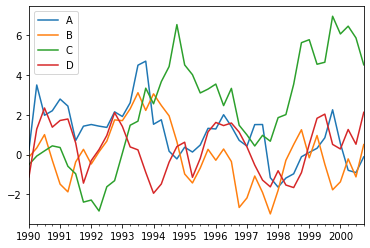

In [75]:
import matplotlib.pyplot as plt

prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)

df = pd.DataFrame(np.random.randn(44, 4), index=ts.index, columns=["A", "B", "C", "D"])

df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');